# <center> <font size = 24 color = 'steelblue'> <b> Word2Vec

## Overview:

The goal is to provide a comprehensive understanding of Word2Vec, covering its key concepts, architecture, and working principles, including CBOW and Skip-gram models. It explains training, vector representation, loss functions, benefits, applications, and limitations, followed by practical implementation. The code example demonstrates library imports, corpus tokenization, model training, extracting word vectors, finding similar words, and visualizing word embeddings.

# Table of Contents

1. [Overview and Explanation](#overview-and-explanation)
2. [Key Concepts](#key-concepts)
3. [Architecture](#architecture)
    - [Continuous Bag of Words (CBOW)](#continuous-bag-of-words-cbow)
    - [Skip-gram](#skip-gram)
4. [Working Principle](#working-principle)
    - [Training Data](#training-data)
    - [Vector Representation](#vector-representation)
    - [Loss Function](#loss-function)
5. [Benefits of Word2Vec](#benefits-of-word2vec)
6. [Applications](#applications)
7. [Limitations](#limitations)
8. [Code Example](#code-example)
    - [Import necessary libraries](#import-necessary-libraries)
    - [Sample corpus](#sample-corpus)
    - [Tokenizing the sentences](#tokenizing-the-sentences)
    - [Train the Word2Vec model](#train-the-word2vec-model)
    - [Get vector for a specific word](#get-vector-for-a-specific-word)
    - [Get the most similar words to a given word](#get-the-most-similar-words-to-a-given-word)
    - [Visualizing Word Vectors](#visualizing-word-vectors)


# Word2Vec: Overview and Explanation

Word2Vec is a popular technique for natural language processing (NLP) that transforms words into numerical vectors in such a way that words with similar meanings have similar representations. Developed by a team led by Tomas Mikolov at Google in 2013, Word2Vec employs neural networks to learn word associations from large datasets.

## Key Concepts

- **Embedding**: A low-dimensional, continuous vector representation of discrete variables (in this case, words).
- **Semantic Similarity**: The ability to quantify how similar the meanings of words are based on their vector representations.

## Architecture

Word2Vec can be implemented using two primary models:

1. **Continuous Bag of Words (CBOW)**:
   - Predicts a target word based on its context (surrounding words).
   - Efficient for small datasets, captures global statistical information.

   **Process**:
   - **Input**: Context words.
   - **Output**: Target word.

   ![Image Description](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/NLP/cbow.png)


2. **Skip-gram**:
   - Predicts context words from a given target word.
   - More effective for larger datasets, captures more local information.

   **Process**:
   - **Input**: Target word.
   - **Output**: Context words.

   ![Image Description](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/NLP/skipgram.png)

## Working Principle

1. **Training Data**:
   - Utilizes large corpuses of text.
   - The model learns word relationships based on the frequency of words appearing together in a specified window of text.

2. **Vector Representation**:
   - Each word is represented as a dense vector in a continuous vector space.
   - The number of dimensions in this space is a hyperparameter that can be adjusted (commonly 100-300 dimensions).

3. **Loss Function**:
   - Uses a loss function to measure the difference between the predicted word probabilities and the actual words. The objective is to minimize this loss through backpropagation.

## Benefits of Word2Vec

- **Efficiency**: Can process large datasets efficiently due to its architecture.
- **Captures Contextual Information**: Models semantic relationships and contextual information between words.
- **Dimensionality Reduction**: Converts high-dimensional one-hot encoded vectors into lower-dimensional dense vectors, making computations more efficient.

## Applications

- **Sentiment Analysis**: Understanding the sentiment of text based on word associations.
- **Machine Translation**: Translating text between languages by understanding contextual word meanings.
- **Information Retrieval**: Enhancing search algorithms by understanding the semantic similarity between search queries and documents.
- **Text Classification**: Classifying documents based on content.

## Limitations

- **Out of Vocabulary (OOV)**: Words not present in the training corpus cannot be represented.
- **No Contextual Information**: Does not capture word order, which can be significant in understanding meaning.
- **Bias**: May inherit biases present in the training data, leading to skewed word representations.




In [ ]:
# Install libraries if not done
!pip install gensim==4.2.0
!pip install nltk==3.8.1
!pip install numpy==1.23.5
!pip install matplotlib==3.6.3
!pip install scikit-learn==1.3.1 

In [9]:
# Import necessary libraries
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import nltk

In [10]:
# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')

[nltk_data] Downloading package punkt to /voc/work/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# Sample corpus (list of sentences)
corpus = [
    "Word embeddings are a type of word representation",
    "Word2Vec is a method to create word embeddings",
    "It uses a neural network model to learn word associations",
    "Word embeddings can capture semantic meanings",
    "They are widely used in natural language processing tasks"
]

In [12]:
# Tokenizing the sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

In [13]:
# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=0)

In [14]:
# Get vector for a specific word
word_vector = model.wv['word2vec']
print("Vector for 'word2vec':\n", word_vector)

Vector for 'word2vec':
 [-0.00515624 -0.00666834 -0.00777684  0.00831073 -0.00198234 -0.00685496
 -0.00415439  0.00514413 -0.00286914 -0.00374966  0.00162143 -0.00277629
 -0.00158436  0.00107449 -0.00297794  0.00851928  0.00391094 -0.00995886
  0.0062596  -0.00675425  0.00076943  0.00440423 -0.00510337 -0.00211067
  0.00809548 -0.00424379 -0.00763626  0.00925791 -0.0021555  -0.00471943
  0.0085708   0.00428334  0.00432484  0.00928451 -0.00845308  0.00525532
  0.00203935  0.00418828  0.0016979   0.00446413  0.00448629  0.00610452
 -0.0032021  -0.00457573 -0.00042652  0.00253373 -0.00326317  0.00605772
  0.00415413  0.00776459  0.00256927  0.00811668 -0.00138721  0.00807793
  0.00371702 -0.00804732 -0.00393361 -0.00247188  0.00489304 -0.00087216
 -0.00283091  0.00783371  0.0093229  -0.00161493 -0.00515925 -0.00470176
 -0.00484605 -0.00960283  0.00137202 -0.00422492  0.00252671  0.00561448
 -0.00406591 -0.00959658  0.0015467  -0.00670012  0.00249517 -0.00378063
  0.00707842  0.00064022  0

In [15]:
# Get the most similar words to a given word
similar_words = model.wv.most_similar('word', topn=5)
print("\nMost similar words to 'word':\n", similar_words)


Most similar words to 'word':
 [('processing', 0.2188088595867157), ('word2vec', 0.21617142856121063), ('natural', 0.19545407593250275), ('network', 0.15161021053791046), ('in', 0.09937167167663574)]


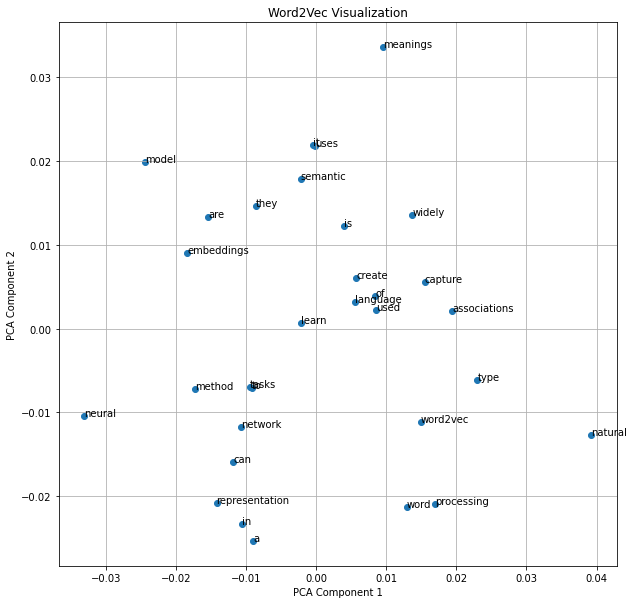

In [16]:
# Visualizing Word Vectors
# Get the word vectors
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plotting the word vectors
plt.figure(figsize=(10, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

# Annotate each point
for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.title("Word2Vec Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()